# **Text Classification v1**


In [2]:
# prompt: extract data.rar

!unrar x data.rar



UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from data.rar

Creating    data                                                      OK
Extracting  data/test.txt                                                 10%  OK 
Extracting  data/train.txt                                                89%  OK 
Extracting  data/val.txt                                                  99%  OK 
All OK


In [34]:
!pip install tensorflow==2.13.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 23.6 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: gast
    Found existing installation: gast 0.6.0
    Uninstalling gast-0.6.0:
      

## 1.import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/train.txt', delimiter=';', header = None, names = ['sentence', 'label'])
val_df = pd.read_csv('data/val.txt', delimiter=';', header = None, names = ['sentence', 'label'])
ts_df = pd.read_csv('data/test.txt', delimiter=';', header = None, names = ['sentence', 'label'])

In [3]:
df.head()

,sentence,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [4]:
df['label'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [5]:
df.label.value_counts()

,count
label,
joy,5362
sadness,4666
anger,2159
fear,1937
love,1304
surprise,572


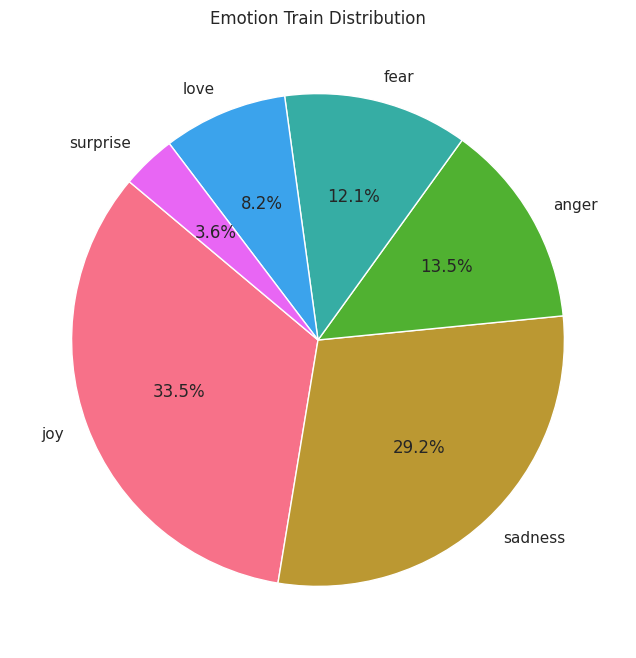

In [6]:
# Count label distributions
label_counts = df['label'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))

plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion Train Distribution')
plt.show()

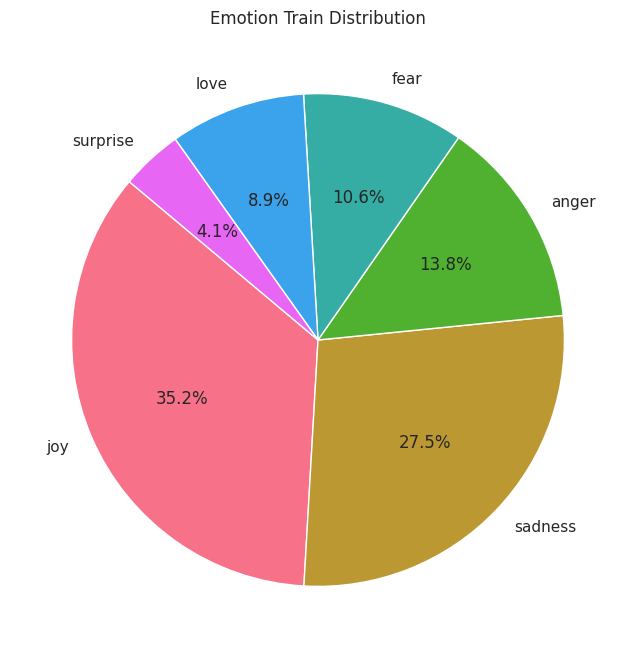

In [7]:
# Count label distributions
label_counts = val_df['label'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))

plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion Train Distribution')
plt.show()

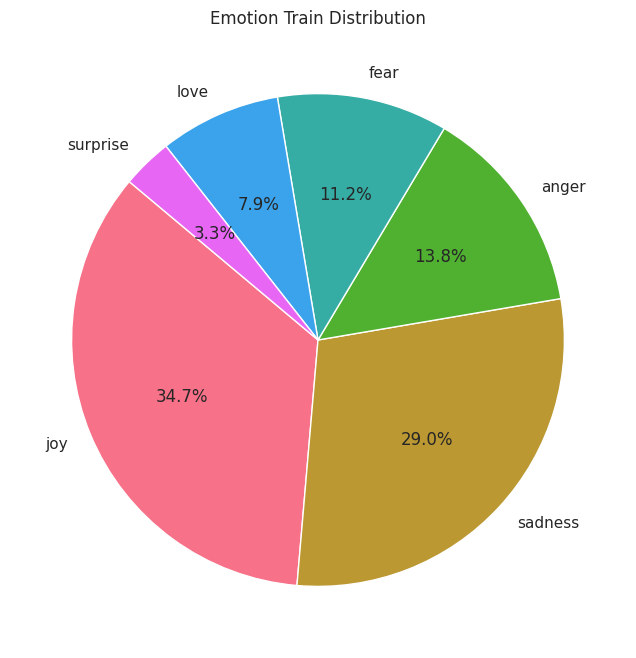

In [8]:
# Count label distributions
label_counts = ts_df['label'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))

plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion Train Distribution')
plt.show()

In [9]:
df = df[~df['label'].str.contains('love') ]
df = df[~df['label'].str.contains('surprise') ]
df.label.unique()

array(['sadness', 'anger', 'fear', 'joy'], dtype=object)

In [10]:
joy = df[ df['label']  == 'joy'  ].sample(n= 2200, random_state=20)
sad = df[ df['label']  == 'sadness'  ].sample(n= 2200, random_state=20)
fear = df[ df['label']  == 'fear'  ].sample(n= 1937, random_state=20)
anger = df[ df['label']  == 'anger'  ].sample(n= 2159, random_state=20)

df_sampled = pd.concat([joy, sad, fear, anger])

df = df_sampled.sample(frac=1, random_state=20).reset_index(drop=True)

In [11]:
df.head()

,sentence,label
0,i feel quite lucky to have stumbled upon it,joy
1,i remember feeling acutely distressed for a fe...,fear
2,i feel the need to tell you that phone calls d...,joy
3,i feel that spitting on somebody is the most v...,anger
4,i feel a little awkward about this but im goin...,sadness


In [12]:
df.label.value_counts()

,count
label,
joy,2200
sadness,2200
anger,2159
fear,1937


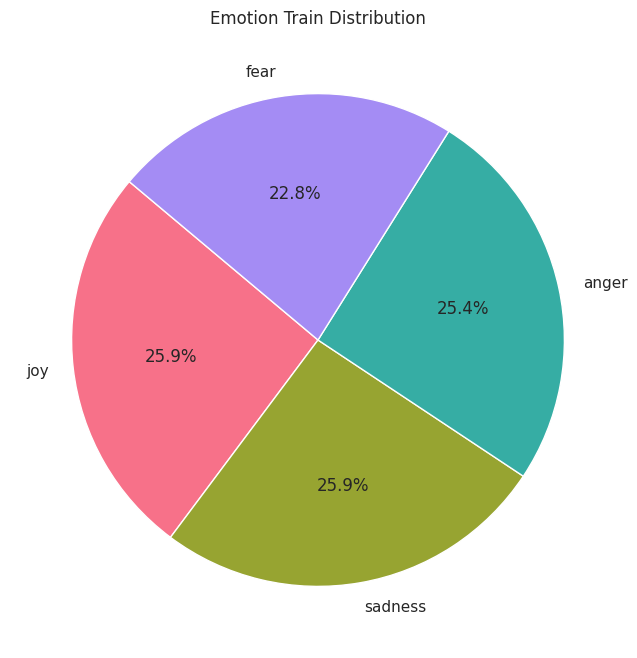

In [13]:
# Count label distributions
label_counts = df['label'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))

plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion Train Distribution')
plt.show()

In [14]:
val_df = val_df[~val_df['label'].str.contains('love')]
val_df = val_df[~val_df['label'].str.contains('surprise')]

In [15]:
joy = val_df[val_df['label'] == 'joy'].sample(n=250, random_state=20)
sad = val_df[val_df['label'] == 'sadness'].sample(n=250, random_state=20)
fear = val_df[val_df['label'] == 'fear'].sample(n=212, random_state=20)
anger = val_df[val_df['label'] == 'anger'].sample(n=275, random_state=20)

df_sampled = pd.concat([joy, sad, fear, anger])

val_df = df_sampled.sample(frac=1, random_state=20).reset_index(drop=True)

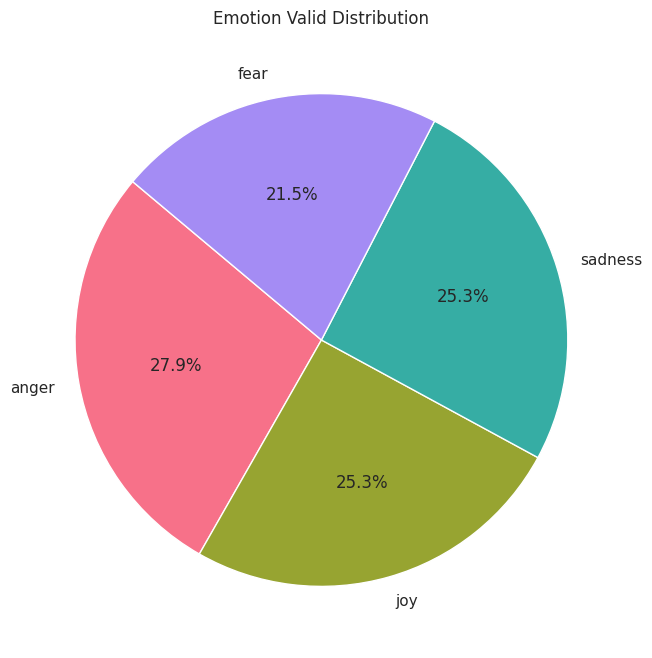

In [16]:
# Count label distributions
label_counts = val_df['label'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion Valid Distribution')
plt.show()

In [17]:
ts_df = ts_df[~ts_df['label'].str.contains('love')]
ts_df = ts_df[~ts_df['label'].str.contains('surprise')]

In [18]:
joy = ts_df[ts_df['label'] == 'joy'].sample(n=250, random_state=20)
sad = ts_df[ts_df['label'] == 'sadness'].sample(n=250, random_state=20)
fear = ts_df[ts_df['label'] == 'fear'].sample(n=224, random_state=20)
anger = ts_df[ts_df['label'] == 'anger'].sample(n=275, random_state=20)

df_sampled = pd.concat([joy, sad, fear, anger])

ts_df = df_sampled.sample(frac=1, random_state=20).reset_index(drop=True)

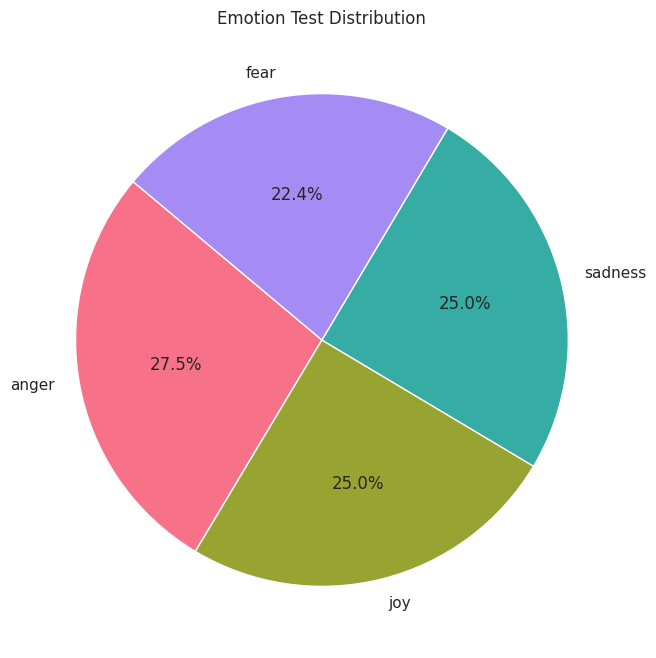

In [19]:
# Count label distributions
label_counts = ts_df['label'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion Test Distribution')
plt.show()

In [20]:
tr_text =df['sentence']
tr_label = df['label']

val_text = val_df['sentence']
val_label = val_df['label']

ts_text = ts_df['sentence']
ts_label = ts_df['label']

## Encoding (processing)

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
tr_label = encoder.fit_transform(tr_label)
val_label = encoder.fit_transform(val_label)
ts_label = encoder.fit_transform(ts_label)

In [22]:
tr_label

array([2, 1, 2, ..., 0, 0, 3])

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [24]:
# Initializing Input vector
class_vector =[2, 5, 6, 1, 4, 2, 3, 2]
print(class_vector)

output_matrix = to_categorical(class_vector, num_classes = 7)

print(output_matrix)

[2, 5, 6, 1, 4, 2, 3, 2]
[[0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]]


In [25]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(tr_text)

sequences = tokenizer.texts_to_sequences(tr_text)
tr_x = pad_sequences(sequences, maxlen=100, padding='post')
tr_y = to_categorical(tr_label)

sequences = tokenizer.texts_to_sequences(val_text)
val_x = pad_sequences(sequences, maxlen=100, padding='post')
val_y = to_categorical(val_label)

sequences = tokenizer.texts_to_sequences(ts_text)
ts_x = pad_sequences(sequences, maxlen=100, padding='post')
ts_y = to_categorical(ts_label)

In [26]:
len(tokenizer.word_counts)

10628

## Embedding & Model Arch

In [27]:
vocab_size = 10628
embedding_dim = 128 # [10628, 128]
input_length = 100
num_classes = 4

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.metrics import Precision, Recall



# Build the LSTM model with enhanced architecture
model = Sequential([
    # Embedding layer to convert words into dense vectors
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length),

    # Bidirectional LSTM layer to capture context from both directions
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),  # Dropout to reduce overfitting

    # Global Max Pooling to reduce sequence length and capture key features
    GlobalMaxPooling1D(),

    # Dense layer with regularization to learn complex representations
    Dense(64, activation='relu'),
    Dropout(0.5),  # Dropout to further reduce overfitting

    # Output layer with softmax activation for multi-class classification
    Dense(num_classes, activation='softmax')
])

In [29]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy', Precision(), Recall()]
)

In [30]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          1360384   
                                                                 
 bidirectional (Bidirection  (None, 100, 128)          98816     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [31]:
# Define early stopping to prevent overfitting based on validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model using training data and validation data
history = model.fit(
    tr_x, tr_y,  # Training inputs and outputs
    epochs=20,  # Maximum number of epochs
    batch_size=32,  # Batch size for training
    validation_data=(val_x, val_y),  # Validation data for monitoring
    callbacks=[early_stopping]  # Early stopping callback
)

Epoch 1/20
266/266 [==============================] - 64s 213ms/step - loss: 1.0319 - accuracy: 0.5253 - precision: 0.8750 - recall: 0.2851 - val_loss: 0.3338 - val_accuracy: 0.9260 - val_precision: 0.9674 - val_recall: 0.8713
Epoch 2/20
266/266 [==============================] - 53s 198ms/step - loss: 0.1815 - accuracy: 0.9466 - precision: 0.9532 - recall: 0.9355 - val_loss: 0.1942 - val_accuracy: 0.9453 - val_precision: 0.9674 - val_recall: 0.9311
Epoch 3/20
266/266 [==============================] - 56s 210ms/step - loss: 0.0801 - accuracy: 0.9763 - precision: 0.9779 - recall: 0.9734 - val_loss: 0.1784 - val_accuracy: 0.9382 - val_precision: 0.9563 - val_recall: 0.9311
Epoch 4/20
266/266 [==============================] - 56s 210ms/step - loss: 0.0538 - accuracy: 0.9845 - precision: 0.9855 - recall: 0.9835 - val_loss: 0.1922 - val_accuracy: 0.9301 - val_precision: 0.9428 - val_recall: 0.9179
Epoch 5/20
266/266 [==============================] - 53s 199ms/step - loss: 0.0383 - accura

In [33]:
# Evaluate the model on the test set
test_loss, test_accuracy, percision, recall = model.evaluate(ts_x, ts_y, verbose=2)
print(f'Test Accuracy: {test_accuracy:.2f}')

32/32 - 1s - loss: 0.1470 - accuracy: 0.9520 - precision: 0.9651 - recall: 0.9419 - 1s/epoch - 36ms/step
Test Accuracy: 0.95


In [34]:
y_true = []

for  i in range(len(ts_y)):

  x = np.argmax(ts_y[i])
  y_true.append(x)

In [35]:
preds = model.predict(ts_x)
y_pred = np.argmax(preds, axis=1)
y_pred

32/32 [==============================] - 4s 65ms/step


array([0, 1, 0, 2, 0, 3, 1, 2, 0, 3, 0, 0, 1, 1, 3, 1, 2, 2, 3, 2, 1, 0,
       2, 0, 3, 3, 1, 3, 2, 0, 2, 3, 1, 1, 3, 0, 2, 0, 3, 1, 3, 2, 1, 0,
       0, 3, 0, 3, 1, 3, 0, 3, 0, 2, 2, 2, 1, 1, 3, 2, 0, 1, 3, 3, 3, 2,
       0, 1, 0, 2, 1, 0, 1, 1, 1, 3, 0, 3, 0, 2, 2, 0, 2, 3, 0, 3, 0, 0,
       2, 2, 0, 2, 3, 1, 2, 2, 2, 3, 3, 1, 2, 2, 3, 1, 1, 2, 3, 0, 2, 1,
       1, 2, 0, 0, 3, 1, 3, 3, 0, 2, 2, 1, 3, 0, 1, 0, 1, 0, 0, 1, 2, 1,
       0, 1, 2, 2, 3, 3, 3, 1, 0, 3, 3, 3, 3, 0, 0, 0, 0, 2, 3, 1, 3, 3,
       3, 2, 3, 3, 0, 3, 1, 3, 1, 2, 3, 0, 1, 1, 1, 0, 2, 3, 1, 3, 2, 3,
       2, 2, 1, 2, 0, 0, 2, 0, 2, 0, 3, 3, 2, 2, 2, 1, 1, 3, 3, 2, 3, 1,
       1, 0, 1, 0, 2, 0, 3, 0, 2, 2, 0, 3, 3, 1, 3, 2, 0, 1, 2, 1, 3, 3,
       0, 2, 1, 2, 1, 0, 3, 3, 1, 0, 1, 0, 3, 1, 3, 1, 0, 3, 0, 3, 3, 2,
       0, 3, 1, 3, 2, 0, 1, 2, 0, 0, 3, 1, 1, 2, 1, 3, 1, 3, 0, 0, 3, 2,
       0, 0, 2, 0, 2, 1, 2, 0, 2, 2, 1, 2, 3, 2, 2, 0, 1, 1, 3, 1, 3, 0,
       2, 1, 1, 0, 1, 1, 3, 3, 2, 3, 0, 3, 0, 2, 2,

<Axes: >

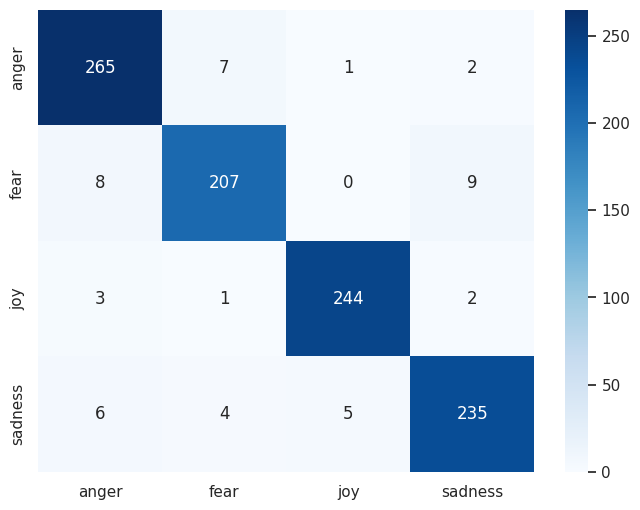

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

plt.figure(figsize=(8,6))
emotions = {0: 'anger', 1: 'fear', 2: 'joy', 3:'sadness'}
emotions = list(emotions.values())
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotions, yticklabels=emotions)

In [38]:
import pickle
with open('tokenizer.pkl', 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)

model.save('nlp.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras.models import load_model

In [44]:
def predict(text, model_path, token_path):

    model = load_model(model_path)


    with open(token_path, 'rb') as f:
        tokenizer = pickle.load(f)

    sequences = tokenizer.texts_to_sequences([text])
    x_new = pad_sequences(sequences, maxlen=100)
    predictions = model.predict(x_new)

    emotions = {0: 'anger', 1: 'fear', 2: 'joy', 3:'sadness'}

    label = list(emotions.values())
    probs = list(predictions[0])

    labels = label

    plt.subplot(1, 1, 1)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt = '%.2f')
    plt.show()

1/1 [==============================] - 1s 893ms/step


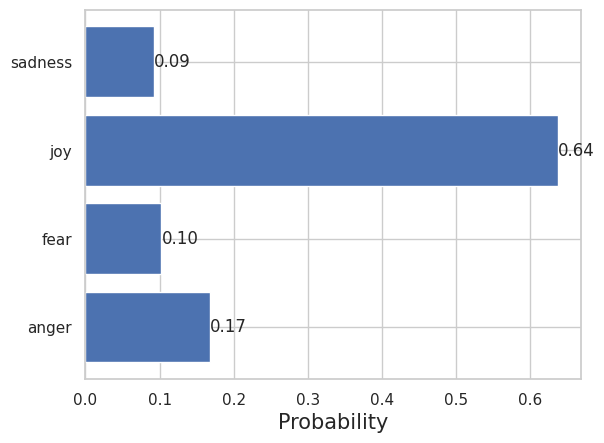

In [45]:
txt = 'I am very happy to finish this project'
predict(txt, 'nlp.h5', 'tokenizer.pkl')

In [43]:
emotions = {0: 'anger', 1: 'fear', 2: 'joy', 3:'sadness'}
list(emotions.values())

['anger', 'fear', 'joy', 'sadness']

1/1 [==============================] - 1s 930ms/step


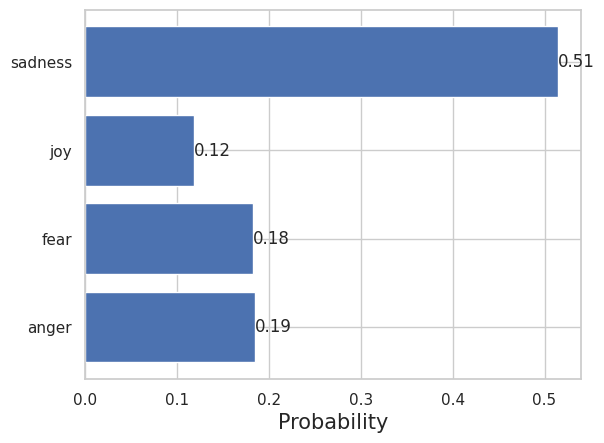

In [46]:
txt = 'I am very sad'
predict(txt, 'nlp.h5', 'tokenizer.pkl')

1/1 [==============================] - 1s 948ms/step


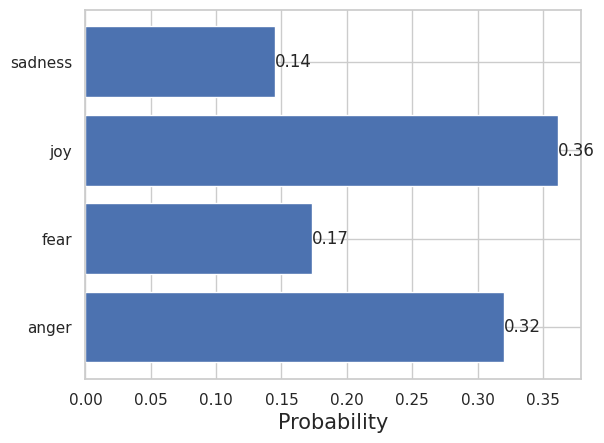

In [47]:
txt = 'Ahhhhhhhhhhhh, I wanna kill myself.'
predict(txt, 'nlp.h5', 'tokenizer.pkl')

1/1 [==============================] - 2s 2s/step


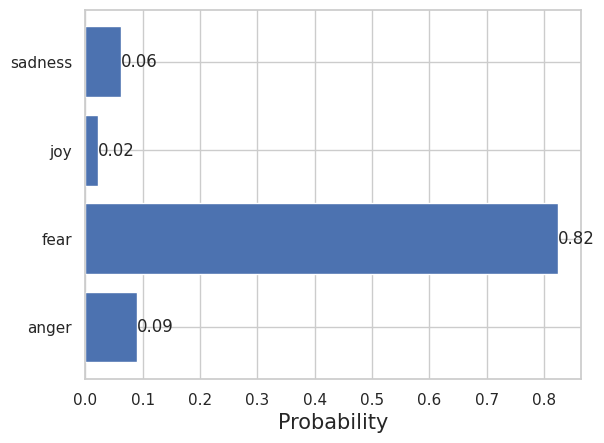

In [48]:
txt = 'I think, i am afraid.'
predict(txt, 'nlp.h5', 'tokenizer.pkl')

In [ ]:
# Task 1

# 1 - create app to predect text
# 2 - deploy with streamlit
# 3 - push your project in GitHub